### 1. Import the required libraries

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torchvision # datasets
import torchvision.datasets.utils
import torchvision.transforms as transforms

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [12]:
## Hyperparameters

input_size = 28*28
hidden_size = 100
num_classes = 10
epochs = 2
batch_size = 100
learning_rate = 0.01

#### 2. Prepare dataset

In [13]:
train_data = torchvision.datasets.MNIST(root='./data', transform= transforms.ToTensor(), train=True, download=True)
test_data = torchvision.datasets.MNIST(root='./data', transform= transforms.ToTensor(), train=False, download=True)

train_loader = torch.utils.data.DataLoader(dataset= train_data, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset= test_data, batch_size = batch_size, shuffle = False)

total_steps = len(train_loader)

In [14]:
example = iter(train_loader)
sample, labels = example.__next__()

print(sample.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


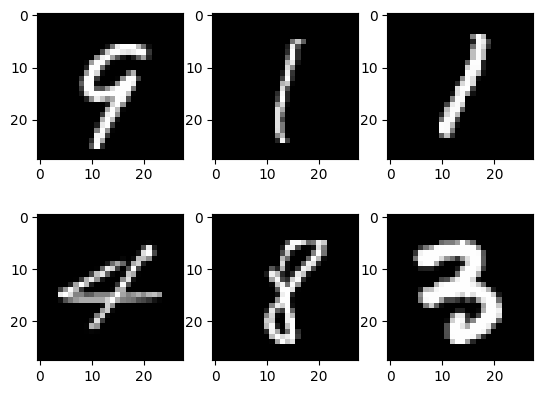

In [15]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(sample[i][0], cmap = 'gray')
plt.show()

##### 3. Create ANN

In [16]:

class network(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super(network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        # no softmax over here as it is applied auomatically at loss ie. CrossEntropyLoss
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
# define model
model = network(input_size= input_size, hidden_size= hidden_size, num_classes= num_classes)

# define loss
criterion = nn.CrossEntropyLoss()

# define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

##### 4. Training

In [17]:
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28)

        # forward pass
        y_pred = model(images)
                
        # loss
        loss = criterion(y_pred, labels)
        
        # backward pass
        optimizer.zero_grad()        
        loss.backward()
        optimizer.step()
        
        # print info
        if (i+1)%100 == 0:
            print(f'epoch : {epoch+1}/{epochs}, step : {i+1}/{total_steps} ,loss : {loss.item():.4f}')
            


epoch : 1/2, step : 100/600 ,loss : 0.3899
epoch : 1/2, step : 200/600 ,loss : 0.1308
epoch : 1/2, step : 300/600 ,loss : 0.0862
epoch : 1/2, step : 400/600 ,loss : 0.1467
epoch : 1/2, step : 500/600 ,loss : 0.1842
epoch : 1/2, step : 600/600 ,loss : 0.1279
epoch : 2/2, step : 100/600 ,loss : 0.2338
epoch : 2/2, step : 200/600 ,loss : 0.0588
epoch : 2/2, step : 300/600 ,loss : 0.2082
epoch : 2/2, step : 400/600 ,loss : 0.0977
epoch : 2/2, step : 500/600 ,loss : 0.2022
epoch : 2/2, step : 600/600 ,loss : 0.3392


##### 5. Evaluation

In [25]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        output = model(images)
                    
        ## value, index
        _, preds = torch.max(output,1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
        
    acc = 100.00 * n_correct / n_samples
    
print(f'Accuracy on test set: {acc:.2f}')

Accuracy on test set: 96.35


In [28]:
# save
path = r'D:\nettech\Study Pytorch with me\model.pth'

# Save the model's state dictionary
torch.save(model.state_dict(), path)
